# Challenge State of Data

### 🎲 Sobre os dados

O questionário foi dividido em 8 partes, e dentro de cada uma das partes temos as perguntas e opções de escolha.

Cada pergunta é dividida em parte, letra da pergunta e número da opção escolhida (as perguntas que tem opção são variáveis dummy)
- Exemplo: P3a_1 = Parte 3, pergunta (a), opção (1)


Parte | Descrição | Variáveis mais importantes
--- | --- | ---
Parte 1 | Dados demográficos | Gênero, idade, cor/raça/etnia, PCD, localização, nível de ensino, área de formação, experiência profissional prejudicada
Parte 2 | Dados sobre carreira | Setor e tamanho da empresa, situação e forma de trabalho, cargo, salário, experiência, satisfação no trabalho
Parte 3 | Desafios dos gestores de times de dados | Tamanho e maturidade da área de dados na empresa, rotina e desafios do gestor
Parte 4 | Conhecimentos na área de dados | Ferramentas de cada área, fontes de dados, linguagens, cloud, power BI
Parte 5 | Objetivos na área de dados | Busca por oportunidades (campos abertos)
Parte 6 | Conhecimentos em Engenharia de Dados/DE | Atividades da rotina, ferramentas, presença de data lake e data warehouse, ferramentas de gestão
Parte 7 | Conhecimentos em Análise de Dados/DA | Rotina de trabalho, ferramentas para dar autonomia para áreas de negócio
Parte 8 | Conhecimentos em Ciências de Dados/DS | Rotina de trabalho, técnicas e métodos, tecnologias

### 🎯 Objetivos

- Fazer uma análise exploratória e visual dos dados
- Fazer análises complexas utilizando técnicas avançadas de Machine Learning
- Usar libs de apps de dados como shiny ou streamlit

### 🔎 Perguntas a serem respondidas na análise exploratória

Seria interessante comparar os dados demográficos obtidos na pesquisa com os dados demográficos da população brasileira, para obter insights sobre a diversidade e inclusão da área.

Seria interessante também saber os dados demográficos dos profissionais de dados no Brasil (que responderam ou não à pesquisa), para que seja possível conhecer a representatividade dos dados da pesquisa na área

Análise de diversidade
- Quem é o público? Quão enviesada a pesquisa pode estar por não ter conseguido alcançar uma parcela representativa da população dos profissionais de dados brasileiros?
- A carreira na área de dados/tecnologia é inclusiva para pessoas com deficiência?

Satisfação dos colaboradores
- O Brasil está perdendo os profissionais da área de dados? O mercado no exterior está mais atrativo/competitivo?
- O tamanho e a maturidade da área de dados na empresa impactam na satisfação do colaborador?

Mercado de trabalho - ferramentas, atividades, tecnologias
- Quais são as principais ferramentas do cientista de dados?
- Quais são as principais atividades da rotina do cientista de dados?

### 🕵🏻‍♀️ Hipóteses a serem testadas

- Empresas mais com uma área de dados mais madura não possuem funcionários mais satisfeitos do que empresas mais iniciantes

## 0. Configuração do ambiente

### 0.1. Bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### 0.2. Dados

In [2]:
data = pd.read_csv('State_of_data_2022.csv')

In [3]:
# criar dicionário com a descrição de cada parte

descricao_parte = {
    'parte': ['parte1', 'parte2', 'parte3', 'parte4', 'parte5', 'parte6', 'parte7', 'parte8'],
    'descricao': ['dados demográficos', 
                  'dados sobre carreira', 
                  'desafios dos gestores de times de dados',
                  'conhecimentos na área de dados',
                  'objetivos na área de dados',
                  'conhecimentos em engenharia de dados',
                  'conhecimentos em análise de dados',
                  'conhecimentos em ciência de dados']
}

descricao_parte = pd.DataFrame(descricao_parte)

## 1. Visão geral do dataframe

In [5]:
# número de linhas e de colunas

data.shape

(4271, 353)

In [ ]:
# como esta base tem muitas colunas, vou checar os temas pelas partes

### 1.1. Função para gerar tabelas de descrição para cada parte

In [4]:
# função para criar uma tabela para cada parte, separando o código, a descrição, a pergunta e as opções

def gerar_tabela_descricao(parte):

    df = data.filter(regex = "^\('P" + str(parte), axis=1).columns.to_frame(name = 'lista').reset_index(drop = True)

    separar = df['lista'].str.split(',', n = 1, expand = True)

    df['codigo'] = separar[0]
    df['codigo'] = df['codigo'].str.replace('(', '')
    df['codigo'] = df['codigo'].str.replace("'", '')
    df['codigo'] = df['codigo'].str.strip()

    df['descricao'] = separar[1]
    df['descricao'] = df['descricao'].str.replace(')', '')
    df['descricao'] = df['descricao'].str.replace("'", '')

    df['pergunta'] = df['codigo'].apply(lambda x: x[3])
    df['opcao'] = df['codigo'].apply(lambda x: x[5] if len(x) >= 6 else None)

    df = df.drop(['lista'], axis = 1)

    return df

# deixar cada dataframe gerado disponível no ambiente de variáveis

for i in list(range(1, 9)):

    dataframe_name = f'parte{i}_descricao'
    df = gerar_tabela_descricao(parte = i)
    globals()[dataframe_name] = df

### 1.2. Função para gerar tabelas para cada parte, alterando o nome das colunas para ser apenas o código

In [5]:
# função para criar uma tabela para cada parte, trocando o nome das colunas em forma de código para apenas a tupla

def partes(parte):

    # selecionar as colunas da parte
    df = data.filter(regex = "^\('P" + str(parte), axis = 1)

    # selecionar a coluna de id
    df_id = data[["('P0', 'id')"]]

    # juntar a coluna de id com as colunas das partes
    df = pd.concat([df_id, df], axis = 1)

    # simplificar os nomes das colunas
    parte_n = eval('parte' + str(parte) + '_descricao')
    df.columns = ['P0'] + parte_n['codigo'].tolist()

    return df

# deixar os dataframes no ambiente de variáveis

for i in list(range(1, 9)):
    
    dataframe_name = f'parte{i}'
    df = partes(parte = i)
    globals()[dataframe_name] = df # coloca no ambiente de variaveis

### 1.3. Função para calcular o percentual de missings de cada coluna

In [6]:
# função para acrescentar uma coluna com o percentual de missings na tabela de descricao

def perc_missings(n_df):

    df_ = eval('parte' + str(n_df) + '_descricao').copy()
    df_['perc_miss'] = df_['codigo'].apply(lambda x: round(eval('parte' + str(n_df))[x].isna().mean() * 100, 2))

    return df_

### 1.4. Análises dos dataframes

In [7]:
# quantas colunas tem em cada parte?

descricao_parte_colunas = descricao_parte.copy()

descricao_parte_colunas['n_colunas'] = descricao_parte_colunas['parte'].apply(lambda x: len(eval(x + '_descricao')))
descricao_parte_colunas['n_perguntas_diferentes'] =  descricao_parte_colunas['parte'].apply(lambda x: eval(x + '_descricao')['pergunta'].nunique())

descricao_parte_colunas

# na forma de lista
# for i in [key for key in list(globals().keys()) if key.startswith('parte')]:
#     print(i, ":", len(eval(i)))

,parte,descricao,n_colunas,n_perguntas_diferentes
0,parte1,dados demográficos,15,12
1,parte2,dados sobre carreira,36,19
2,parte3,desafios dos gestores de times de dados,38,4
3,parte4,conhecimentos na área de dados,100,9
4,parte5,objetivos na área de dados,4,4
5,parte6,conhecimentos em engenharia de dados,59,8
6,parte7,conhecimentos em análise de dados,50,5
7,parte8,conhecimentos em ciência de dados,50,5


## 2. Distribuições das variáveis demográficas

In [49]:
# olhar os nomes das colunas e o percentual de missings de cada coluna

perc_missings(n_df = 1)#.sort_values('perc_miss', ascending = False)

,codigo,descricao,pergunta,opcao,perc_miss
0,P1_a,Idade,a,None,1.73
1,P1_a_1,Faixa idade,a,1,0.00
2,P1_b,Genero,b,None,0.21
3,P1_c,Cor/raca/etnia,c,None,0.00
4,P1_d,PCD,d,None,0.00
5,P1_e,experiencia_profissional_prejudicada,e,None,48.72
6,P1_f,aspectos_prejudicados,f,None,80.40
7,P1_g,vive_no_brasil,g,None,0.00
8,P1_i,Estado onde mora,i,None,2.69
9,P1_i_1,uf onde mora,i,1,2.69


In [8]:
# visão geral dos dados

parte1.head()

,P1_a,P1_a_1,P1_b,P1_c,P1_d,P1_e,P1_f,P1_g,P1_i,P1_i_1,P1_i_2,P1_j,P1_k,P1_l,P1_m
0,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),DF,Centro-oeste,False,Sudeste,Pós-graduação,Computação / Engenharia de Software / Sistemas...
1,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),PA,Norte,True,NaN,Graduação/Bacharelado,Outras Engenharias
2,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),DF,Centro-oeste,False,Sul,Pós-graduação,Computação / Engenharia de Software / Sistemas...
3,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),MG,Sudeste,True,NaN,Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...
4,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),PA,Norte,True,NaN,Pós-graduação,Computação / Engenharia de Software / Sistemas...


### Idade

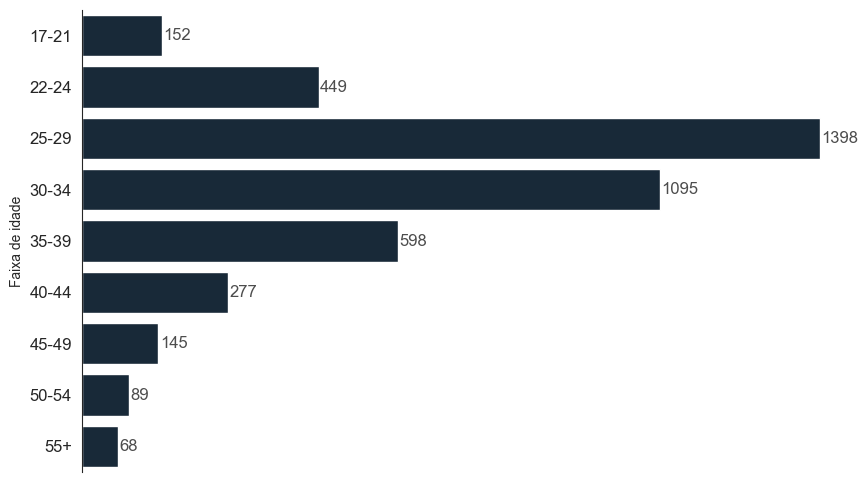

In [35]:
# parte1['P1_a_1'].value_counts().to_frame().reset_index().sort_values('P1_a_1')

plt.figure(figsize = (10, 6))
sns.set_style('white') # also 'ticks', 'darkgrid', 'whitegrid', white
fig = sns.barplot(data = parte1['P1_a_1'].value_counts().to_frame().reset_index().sort_values('P1_a_1'), 
                  x = 'count', 
                  y = 'P1_a_1', 
                  color = '#13293d')

# colocar os números no final da barra
for i in fig.patches:
    fig.annotate(int(i.get_width()),
                  (i.get_width(), i.get_y() + i.get_height() / 2),
                  ha = 'left', va = 'center', fontsize = 12,
                  color = '#4d4d4d', xytext = (1, 0),
                  textcoords = 'offset points')
    
# mudar os títulos dos eixos
fig.set_ylabel('Faixa de idade')
fig.set_xlabel('')

# remover os números do eixo x
fig.set_xticklabels('')
fig.set_yticklabels(fig.get_yticklabels(), fontsize=12)

# remover as bordas do gráfico
sns.despine(bottom = True)

# deixar o gráfico transparente
# plt.gcf().set_facecolor('none')
# plt.gca().patch.set_alpha(0)

In [8]:
# qual a distribuição de faixa de idade para quem não informou idade?

parte1[parte1['P1_a'].isna()]['P1_a_1'].value_counts()

P1_a_1
55+      68
17-21     6
Name: count, dtype: int64

In [ ]:
# aparentemente, os nulos foram preenchidos ou com a menor faixa de idade ou com a maior

### Gênero

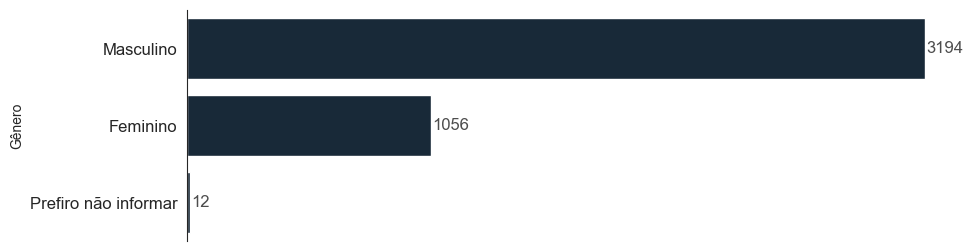

In [38]:
# parte1['P1_a_1'].value_counts().to_frame().reset_index().sort_values('P1_a_1')

plt.figure(figsize = (10, 3))
sns.set_style('white') # also 'ticks', 'darkgrid', 'whitegrid', white
fig = sns.barplot(data = parte1['P1_b'].value_counts().to_frame().reset_index().sort_values('count', ascending = False), 
                  x = 'count', 
                  y = 'P1_b', 
                  color = '#13293d')

# colocar os números no final da barra
for i in fig.patches:
    fig.annotate(int(i.get_width()),
                  (i.get_width(), i.get_y() + i.get_height() / 2),
                  ha = 'left', va = 'center', fontsize = 12,
                  color = '#4d4d4d', xytext = (1, 0),
                  textcoords = 'offset points')
    
# mudar os títulos dos eixos
fig.set_ylabel('Gênero')
fig.set_xlabel('')

# remover os números do eixo x
fig.set_xticklabels('')
fig.set_yticklabels(fig.get_yticklabels(), fontsize=12)

# remover as bordas do gráfico
sns.despine(bottom = True)

# deixar o gráfico transparente
# plt.gcf().set_facecolor('none')
# plt.gca().patch.set_alpha(0)

### Idade + Gênero

In [12]:
parte1[['P1_a_1', 'P1_b']].value_counts().to_frame().reset_index().sort_values('count', ascending = False)

,P1_a_1,P1_b,count
0,25-29,Masculino,1005
1,30-34,Masculino,799
2,35-39,Masculino,453
3,25-29,Feminino,379
4,22-24,Masculino,372
5,30-34,Feminino,294
6,40-44,Masculino,210
7,35-39,Feminino,145
8,17-21,Masculino,116
9,45-49,Masculino,104


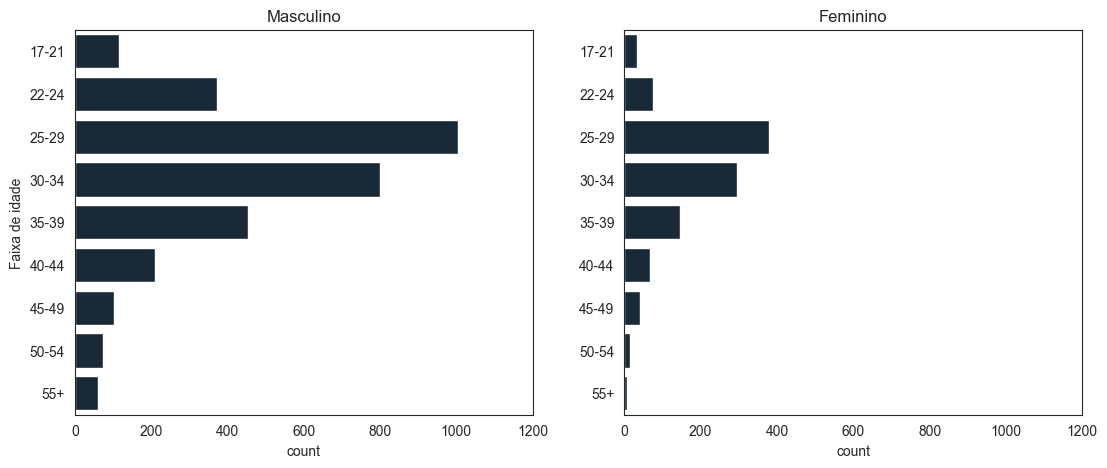

In [28]:
# criar uma figura e os subplots
fig, axes = plt.subplots(1, 2, figsize = (13, 5))

df = parte1[['P1_a_1', 'P1_b']].value_counts().to_frame().reset_index().sort_values('P1_a_1', ascending = True)

# G1
sns.barplot(x = 'count',
            y = 'P1_a_1',
            data = df[df['P1_b'] == 'Masculino'],
            ax = axes[0],
            orient = 'h',
            palette = ['#13293d'])

axes[0].set_title('Masculino')

# G2
sns.barplot(x = 'count',
            y = 'P1_a_1',
            data = df[df['P1_b'] == 'Feminino'],
            ax = axes[1],
            orient = 'h',
            palette = ['#13293d'])

axes[1].set_title('Feminino')

# definir o mesmo limite do eixo x para ambos os gráficos
axes[0].set_xlim(0, 1200)
axes[1].set_xlim(0, 1200)

# nome do eixo y
axes[0].set_ylabel('Faixa de idade')
axes[1].set_ylabel('')

# exibir os gráficos
plt.show()

## 3. Distribuições das variáveis organizacionais

In [55]:
pd.set_option('display.max_colwidth', None)

perc_missings(n_df = 2)

,codigo,descricao,pergunta,opcao,perc_miss
0,P2_a,Qual sua situação atual de trabalho?,a,None,0.00
1,P2_b,Setor,b,None,13.51
2,P2_c,Numero de Funcionarios,c,None,13.51
3,P2_d,Gestor?,d,None,13.51
4,P2_e,Cargo como Gestor,e,None,83.31
5,P2_f,Cargo Atual,f,None,30.20
6,P2_g,Nivel,g,None,30.20
7,P2_h,Faixa salarial,h,None,13.51
8,P2_i,Quanto tempo de experiência na área de dados você tem?,i,None,13.51
9,P2_j,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,j,None,13.51


In [9]:
parte2.head()

,P0,P2_a,P2_b,P2_c,P2_d,P2_e,P2_f,P2_g,P2_h,P2_i,...,P2_o_5,P2_o_6,P2_o_7,P2_o_8,P2_o_9,P2_o_10,P2_p,P2_q,P2_r,P2_s
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,Servidor Público,Setor Público,Acima de 3.000,False,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,...,0.0,0.0,0.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...
1,zzls2oftfn9law393oezzls2ofhvfpzd,Empregado (CLT),Outra Opção,Acima de 3.000,True,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,...,0.0,0.0,1.0,0.0,0.0,1.0,Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,Empregado (CLT),Finanças ou Bancos,Acima de 3.000,False,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,...,0.0,0.0,0.0,0.0,0.0,0.0,Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,Empregado (CLT),Setor Automotivo,Acima de 3.000,False,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,...,0.0,1.0,0.0,0.0,0.0,0.0,Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,Servidor Público,Setor Público,de 101 a 500,False,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,...,0.0,1.0,1.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...


In [11]:
parte2.filter(regex = "^P2_l", axis = 1)

,P2_l,P2_l_1,P2_l_2,P2_l_3,P2_l_4,P2_l_5,P2_l_6,P2_l_7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Falta de oportunidade de crescimento no empreg...,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Falta de oportunidade de crescimento no empreg...,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Falta de oportunidade de crescimento no empreg...,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
4266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. 